# Cisalhamento e Animações em Transformações Lineares

In [1]:
#%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Funções utilitárias

In [2]:
def shear_matrix_horizontal(k):
    return np.array([[1, k], [0, 1]])

def shear_matrix_vertical(k):
    return np.array([[1, 0], [k, 1]])

def rotation_matrix(theta):
    rad = np.radians(theta)
    return np.array([[np.cos(rad), -np.sin(rad)], [np.sin(rad), np.cos(rad)]])

def plot_grid_transformation(matrix, title=""):
    matrix = np.array(matrix)
    x = np.linspace(-3, 3, 10)
    y = np.linspace(-3, 3, 10)
    xx, yy = np.meshgrid(x, y)
    points = np.vstack([xx.ravel(), yy.ravel()])
    transformed_points = matrix @ points
    tx, ty = transformed_points[0, :], transformed_points[1, :]
    plt.figure(figsize=(6, 6))
    plt.scatter(xx, yy, color='gray', s=20, label='Grade Original')
    plt.scatter(tx, ty, color='red', s=20, label='Grade Transformada')
    plt.grid(True, linestyle='--')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    max_val = np.max(np.abs(transformed_points)) * 1.1
    plt.xlim(-max_val, max_val)
    plt.ylim(-max_val, max_val)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(title)
    plt.legend()
    plt.show()

def animate_transform(matrix_final, steps=30):
    vectors = np.array([[1, 0], [0, 1], [1, 1], [-1, 0.5]])
    fig, ax = plt.subplots(figsize=(6, 6))

    def update(frame):
        ax.clear()
        alpha = frame / steps
        T = (1 - alpha) * np.eye(2) + alpha * matrix_final
        for v in vectors:
            v_t = T @ v
            ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='b', alpha=0.5)
            ax.quiver(0, 0, v_t[0], v_t[1], angles='xy', scale_units='xy', scale=1, color='r')
        ax.set_xlim(-3, 3)
        ax.set_ylim(-3, 3)
        ax.grid(True)
        ax.axhline(0, color='k', linewidth=0.5)
        ax.axvline(0, color='k', linewidth=0.5)
        ax.set_title(f"Interpolação passo {frame}/{steps}")
        ax.set_aspect('equal', adjustable='box')

    ani = FuncAnimation(fig, update, frames=steps + 1, interval=200)
    return ani  # Importante: guardar em variável ao chamar para não ser descartado

# Exemplos:

## Cisalhamento horizontal

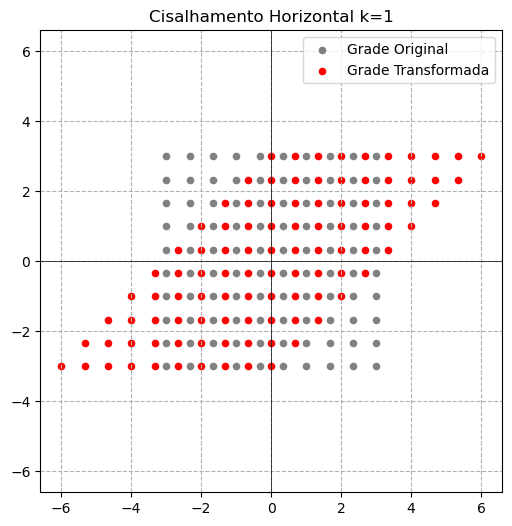

In [3]:
k_h = 1
shear_h = shear_matrix_horizontal(k_h)
plot_grid_transformation(shear_h, f"Cisalhamento Horizontal k={k_h}")

## Cisalhamento vertical

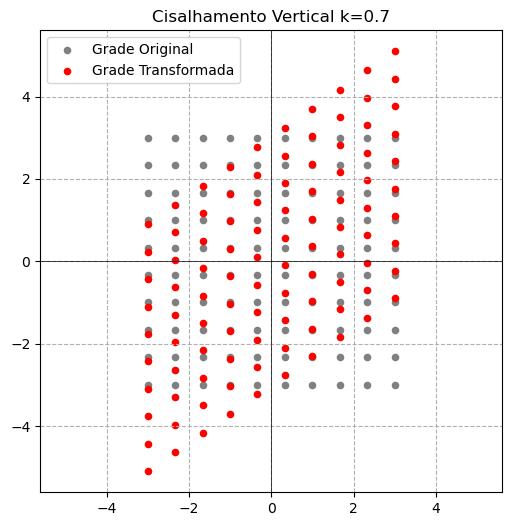

In [4]:
k_v = 0.7
shear_v = shear_matrix_vertical(k_v)
plot_grid_transformation(shear_v, f"Cisalhamento Vertical k={k_v}")

## Animação de cisalhamento horizontal

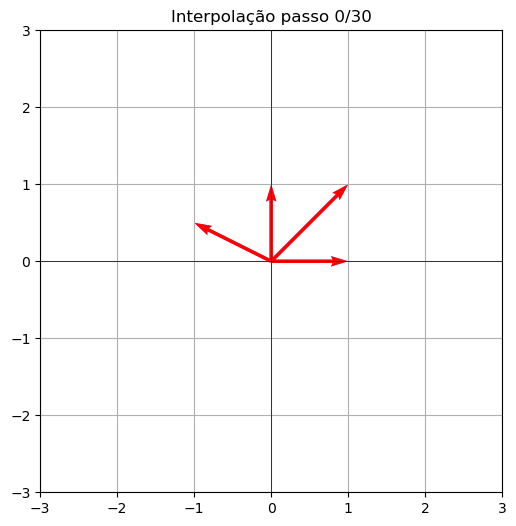

In [7]:
ani = animate_transform(shear_matrix_horizontal(1))
HTML(ani.to_jshtml())

## Animação de rotação

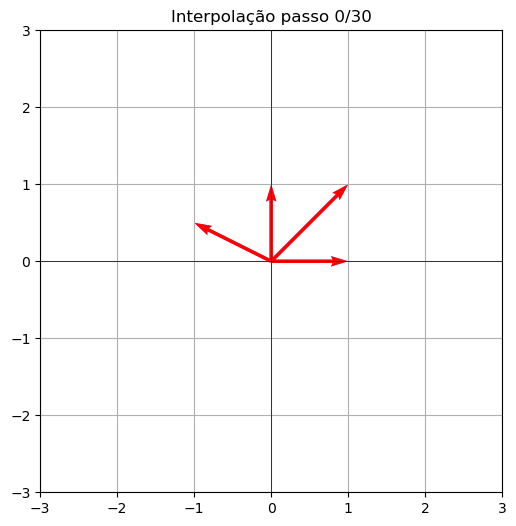

In [8]:
ani_rot = animate_transform(rotation_matrix(45))
#plt.show()
HTML(ani_rot.to_jshtml())

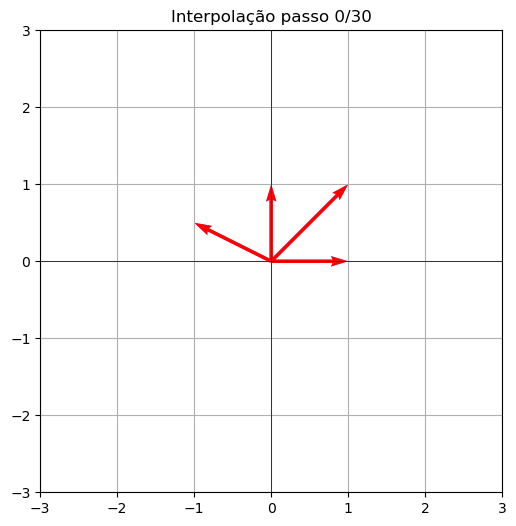

In [9]:
def shear_matrix_horizontal(k):
    return np.array([[1, k], [0, 1]])

def animate_transform(matrix_final, steps=30):
    vectors = np.array([[1, 0], [0, 1], [1, 1], [-1, 0.5]])
    fig, ax = plt.subplots(figsize=(6, 6))

    def update(frame):
        ax.clear()
        alpha = frame / steps
        T = (1 - alpha) * np.eye(2) + alpha * matrix_final
        for v in vectors:
            v_t = T @ v
            ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='b', alpha=0.5)
            ax.quiver(0, 0, v_t[0], v_t[1], angles='xy', scale_units='xy', scale=1, color='r')
        ax.set_xlim(-3, 3)
        ax.set_ylim(-3, 3)
        ax.grid(True)
        ax.axhline(0, color='k', linewidth=0.5)
        ax.axvline(0, color='k', linewidth=0.5)
        ax.set_title(f"Interpolação passo {frame}/{steps}")
        ax.set_aspect('equal', adjustable='box')

    ani = FuncAnimation(fig, update, frames=steps + 1, interval=200)
    return ani

# Teste da animação
ani = animate_transform(shear_matrix_horizontal(1))
HTML(ani.to_jshtml())